<a href="https://colab.research.google.com/github/akitim/skillfactory_rds/blob/main/module_2/Project_2_EDA_Timofey_Akimkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Подготовка среды

In [ ]:
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
 
# import sys
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# sys.path.clear
# sys.path.append('/content/gdrive/MyDrive/SkillFactory')

/usr/lib/python3.7/threading.py:874: ResourceWarning: unclosed file <_io.FileIO name=77 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.7/threading.py:874: ResourceWarning: unclosed file <_io.FileIO name=78 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs


Mounted at /content/gdrive


#Считывание датафрейма из файла

In [ ]:
# students = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/stud_math.csv')
students = pd.read_csv('stud_math.csv')
display(students.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
303,GP,F,17,U,GT3,T,3.0,2.0,health,NaN,reputation,father,1.0,4.0,0.0,no,yes,yes,yes,no,-12.0,yes,yes,no,5.0,2.0,2.0,5.0,0.0,90.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,course,mother,3.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
342,GP,M,18,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,NaN,4.0,3.0,3.0,NaN,11.0,75.0
240,GP,M,17,U,LE3,T,4.0,3.0,health,other,course,NaN,2.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,yes,2.0,5.0,5.0,5.0,14.0,60.0
16,GP,F,16,U,GT3,T,4.0,4.0,services,services,reputation,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,2.0,3.0,2.0,6.0,70.0
326,GP,M,17,U,GT3,T,3.0,3.0,other,services,reputation,mother,1.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,3.0,5.0,5.0,3.0,80.0
230,GP,F,17,U,LE3,T,4.0,3.0,health,other,reputation,father,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,yes,3.0,2.0,3.0,3.0,14.0,70.0
257,GP,M,19,U,LE3,A,4.0,3.0,services,at_home,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,1.0,1.0,12.0,55.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0


#Пользовательские функции

In [ ]:
# функция принимает датафрейм, выводит value_counts по всем столбцам
# и количество значений NaN в каждом столбце
def counts_info(df):
    for col in df.columns:
        vc = df.loc[:, col].value_counts(dropna=False)
        display(pd.DataFrame(vc))
        if vc[pd.isna(vc.index)].empty:
            msg = f'\nВ столбце {col} не содержится значений NaN\n'
        else:
            nnan = vc[pd.isna(vc.index)].values[0]
            msg = f'\nВ столбце {col} содержится значений NaN: {nnan}\n'    
        print (f'\nВ столбце {col} значений, встречающихся больше 10 раз: '
            , (df.loc[:, col].value_counts() > 10).sum())
        print (msg)
        print ('---------------------------------------------------')

#функция принимает столбец датафрейма students
#и строит график типа boxplot для распределения
#столбца score по категориальным столбцам
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(
        x=column,
        y='score',
        data=students.loc[students.loc[:, column].isin(students.loc[:, column].
                    value_counts().index[:10])],
        ax=ax
    )
    plt.xticks(rotation=45)
    ax.set_title('Boxplot для ' + column)
    ax.set_ylim(bottom=0,top=110)
    plt.show()
 
# Функция принимает столбец датафрейма в виде <pandas.Series>
# и строит полную гистограмму данных серии и гистограмму
# внутри границ выбросов, если аргумент plot_hist=True.
# Возвращает список: [нижняя гр. выбросов, верхняя гр. выбросов, IQR]
def find_IQR_outliers(se, plot_hist=True):
    quant25 = se.quantile(0.25)
    quant75 = se.quantile(0.75)
    IQR = quant75 - quant25
    lower_bound = quant25 - 1.5*IQR
    upper_bound = quant75 + 1.5*IQR
    
    if plot_hist:
        print (f'Гистограмма для {se.name}')
        print (
            f'Межквартильный интервал: [ {quant25}, {quant75} ]'
        )
        print (
            f'Границы выбросов: [ {lower_bound}, {upper_bound} ]'
        )
        se.loc[se.between(lower_bound, upper_bound)].hist(
            bins = 16,
            range = (se.min(), se.max()),
            label = 'IQR'
        )
        se.hist(
            alpha = 0.5,
            bins = 16,
            range = (se.min(), se.max()),
            label = 'All'
        )
        plt.legend()
        plt.show()
 
    return (lower_bound, upper_bound, IQR)
 
# Функция принимает колонку с номинативными данными датафрейма
# в виде <pandas.Series> и проводит двухсторонний тест Стьюдента
# по выборкам переменной score, соотв. всевозможным парам значений
# номинативных признаков
def get_stat_dif(column, alpha=0.05, most_freq=5):
    # взяты 5 наиболее часто встречающихся значений, можно варьировать
    cols = students.loc[:, column].value_counts(dropna=True).index[:most_freq] 
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
              students.loc[students.loc[:, column] == comb[0], 'score'], 
              students.loc[students.loc[:, column] == comb[1], 'score']
            ).pvalue <= alpha/len(combinations_all): # поправка Бонферрони
            print('Найдены статистически значимые различия для столбца', column)
            break

def get_stat_dif_0(column, alpha=0.05, most_freq=5):
    # взяты 5 наиболее часто встречающихся значений, можно варьировать
    cols = students_zero_score.loc[:, column].value_counts(dropna=True).index[:most_freq] 
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
              students_zero_score.loc[students_zero_score.loc[:, column] == comb[0], 'score'], 
              students_zero_score.loc[students_zero_score.loc[:, column] == comb[1], 'score']
            ).pvalue <= alpha/len(combinations_all): # поправка Бонферрони
            print('Найдены статистически значимые различия для столбца', column)
            break

#Характеристика датасета

In [ ]:
print('\nОбщая характеристика датасета:')
students.info();
 
print('\nСтатистическая характеристика датасета:')
students.describe()


Общая характеристика датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsu

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


#Анализ значений столбцов:

In [3]:
#Приведем названия столбцов к однообразному виду
students.columns = map(lambda s: s.replace(', ', '_').lower(),
                            students.columns)
print(students.columns)

#Числовые столбцы

In [ ]:
# проверим, какие значения присутствуют в числовых столбцах
# и сколько из них значений NaN
full_row_index = 4 #в строке 4 все значения корректные
counts_info(students.loc[:, students.loc[full_row_index, :].apply(type) != str])

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1



В столбце age значений, встречающихся больше 10 раз:  5

В столбце age не содержится значений NaN

---------------------------------------------------


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3



В столбце medu значений, встречающихся больше 10 раз:  4

В столбце medu содержится значений NaN: 3

---------------------------------------------------


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1



В столбце fedu значений, встречающихся больше 10 раз:  4

В столбце fedu содержится значений NaN: 24

---------------------------------------------------


,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7



В столбце traveltime значений, встречающихся больше 10 раз:  3

В столбце traveltime содержится значений NaN: 28

---------------------------------------------------


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7



В столбце studytime значений, встречающихся больше 10 раз:  4

В столбце studytime содержится значений NaN: 7

---------------------------------------------------


,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15



В столбце failures значений, встречающихся больше 10 раз:  4

В столбце failures содержится значений NaN: 22

---------------------------------------------------


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7



В столбце studytime_granular значений, встречающихся больше 10 раз:  4

В столбце studytime_granular содержится значений NaN: 7

---------------------------------------------------


,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1



В столбце famrel значений, встречающихся больше 10 раз:  4

В столбце famrel содержится значений NaN: 27

---------------------------------------------------


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11



В столбце freetime значений, встречающихся больше 10 раз:  5

В столбце freetime содержится значений NaN: 11

---------------------------------------------------


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8



В столбце goout значений, встречающихся больше 10 раз:  5

В столбце goout содержится значений NaN: 8

---------------------------------------------------


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15



В столбце health значений, встречающихся больше 10 раз:  5

В столбце health содержится значений NaN: 15

---------------------------------------------------


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8



В столбце absences значений, встречающихся больше 10 раз:  8

В столбце absences содержится значений NaN: 12

---------------------------------------------------


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16



В столбце score значений, встречающихся больше 10 раз:  12

В столбце score содержится значений NaN: 6

---------------------------------------------------


In [ ]:
#  В столбце fedu одно значение >4 (40), вполне вероятно,
#  что это значение неправильно обработанное значение 4.
#  Заменим это значение на 4:
students.loc[students.loc[:, 'fedu'] == 40, 'fedu'] = 4
 
#  В столбце famrel одно значение <0 (-1), вполне вероятно,
#  что это значение неправильно обработанное значение 1
#  Заменим это значение на 1:
students.loc[students.loc[:, 'famrel'] == -1, 'famrel'] = 1
 
# Удалим также из датафрейма строки с пустыми значениями
# столбца score
students.drop(
    students.loc[pd.isna(students.loc[:, 'score']), 'score'].index,
    axis=0,
    inplace=True    
)

#Устранение выбросов в числовых столбцах

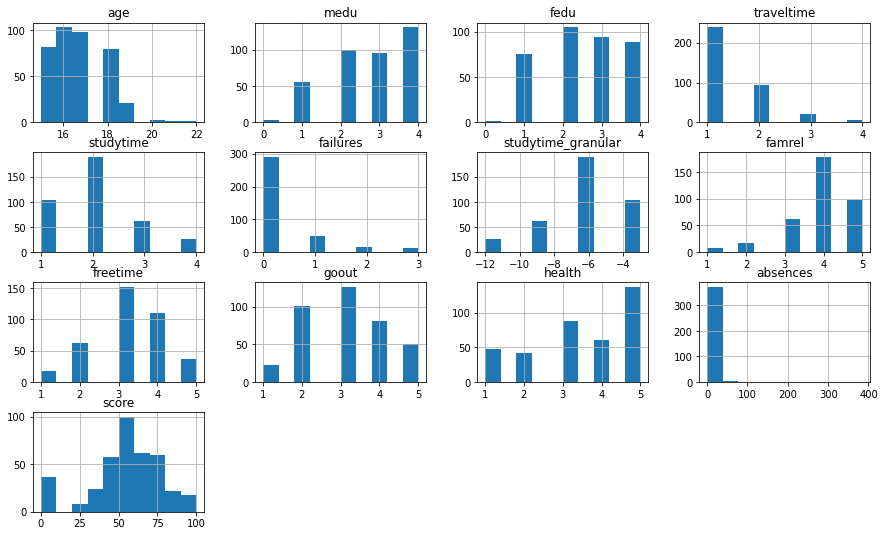

In [ ]:
#Обзор распределения данных в числовых столбцах
students.hist(figsize =(15,9));

Гистограмма для age
Межквартильный интервал: [ 16.0, 18.0 ]
Границы выбросов: [ 13.0, 21.0 ]


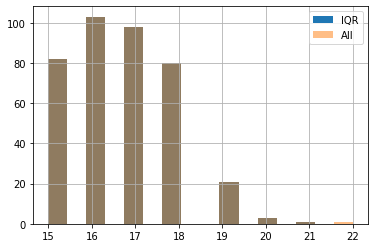

In [ ]:
#Рассмотрим столбцы с самыми 'широкими' распределениями
L_age, U_age, IQR_age = find_IQR_outliers(students.loc[:, 'age'])

In [ ]:
# Посмотрим, сколько значений age лежат
# вне границ выбросов:

mask_age_inside = students.loc[:, 'age'].between(L_age, U_age)

num_of_out_abscences = students.loc[
    mask_age_inside.apply(lambda x: not(x)), 'age'
].count()
print(
    'Вне границ выбросов лежат:', num_of_out_abscences,
    '(≈', round(num_of_out_abscences / students.loc[:, 'age'].count()*100, 1),
    '%) значений столбца age'
)

Вне границ выбросов лежат: 1 (≈ 0.3 %) значений столбца age


In [ ]:
# Это небольшая доля значений, можно считать их выбросами
# и удалить из столбца age:
students.loc[
             mask_age_inside.apply(lambda x: not(x)), 'age'
] = None
#pd.DataFrame(students.loc[:, 'age']).info()

Гистограмма для absences
Межквартильный интервал: [ 0.0, 8.0 ]
Границы выбросов: [ -12.0, 20.0 ]


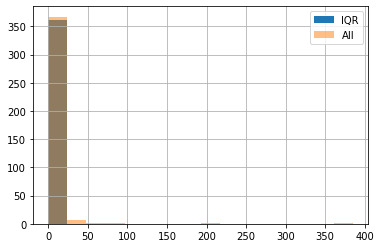

In [ ]:
L_abs, U_abs, IQR_abs = find_IQR_outliers(students.loc[:, 'absences'])

In [ ]:
# Посмотрим, сколько значений absences лежат
# вне границ выбросов:

mask_absences_inside = students.loc[:, 'absences'].between(L_abs, U_abs)

num_of_out_abscences = students.loc[mask_absences_inside.apply(lambda x: not(x)), 
             'absences'].count()
print(
    'Вне границ выбросов лежат:', num_of_out_abscences,
    '(≈', round(num_of_out_abscences / students.loc[:, 'absences'].count()*100),
    '%) значений столбца absences'
)

Вне границ выбросов лежат: 17 (≈ 4 %) значений столбца absences


In [ ]:
# Это небольшая доля значений, можно считать их выбросами
# и удалить из столбца absences:
students.loc[
             mask_absences_inside.apply(lambda x: not(x)), 'absences'
] = None
#pd.DataFrame(students.loc[:, 'absences']).info()

Гистограмма для score
Межквартильный интервал: [ 40.0, 70.0 ]
Границы выбросов: [ -5.0, 115.0 ]


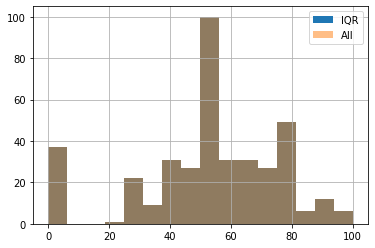

(-5.0, 115.0, 30.0)

In [ ]:
find_IQR_outliers(students.loc[:, 'score'])

In [ ]:
# Значения score, равные нулю, хотя и лежат
# внутри интервала выбросов, выглядят выбивающимися
# из распределения величины score 
 
print(
    'Среднее значение score:',
    round(students.loc[:, 'score'].mean(), 1),
    '\nCтандартное отклонение score:',
    round(students.loc[:, 'score'].std(), 1)
)
 
# Нулевые значения score лежат на расстоянии 
# (57.8-0)/16.2 ≈ 3.6σ от среднего значения.
# В предположении нормального распределения величины score ~ N(57.8, 16.2^2)
# матожидание количества наблюдений score = 0:
print('\nМатожидание количества наблюдений score = 0:',
    round(norm.cdf((0-57.8)/16.2)*students.loc[:, 'score'].count(), 2)
)
 
print ('Реализованное количество наблюдений score = 0:',
     students.loc[students.loc[:, 'score'] == 0, 'score'].count()    
)
 
# т.е. мы имеем превышение в 37/0.07 ≈ 530,
# что крайне маловероятно, исходя из наших предположений.
# С другой стороны, score - целевая переменная модели, поэтому
# возможно имеет смысл моделировать ее нулевые значения отдельно.
 
# Сохраним строки с нулевыми значениями score в отдельный датафрейм
students_zero_score = students.loc[students.loc[:, 'score'] == 0, :]
 
#Удалим нулевые значения score из основного набора данных
students.drop(
    students.loc[students.loc[:, 'score'] == 0, 'score'].index,
    axis=0,
    inplace=True    
)

Среднее значение score: 52.3 
Cтандартное отклонение score: 22.9

Матожидание количества наблюдений score = 0: 0.07
Реализованное количество наблюдений score = 0: 37


#Строковые столбцы

In [ ]:
# проверим, какие значения присутствуют в строковых столбцах
# и сколько из них значений NaN 
counts_info(students.loc[:, students.loc[full_row_index, :].apply(type) == str])

,school
GP,311
MS,41



В столбце school значений, встречающихся больше 10 раз:  2

В столбце school не содержится значений NaN

---------------------------------------------------


,sex
F,182
M,170



В столбце sex значений, встречающихся больше 10 раз:  2

В столбце sex не содержится значений NaN

---------------------------------------------------


,address
U,265
R,73
NaN,14



В столбце address значений, встречающихся больше 10 раз:  2

В столбце address содержится значений NaN: 14

---------------------------------------------------


,famsize
GT3,228
LE3,100
NaN,24



В столбце famsize значений, встречающихся больше 10 раз:  2

В столбце famsize содержится значений NaN: 24

---------------------------------------------------


,pstatus
T,277
NaN,41
A,34



В столбце pstatus значений, встречающихся больше 10 раз:  2

В столбце pstatus содержится значений NaN: 41

---------------------------------------------------


,mjob
other,115
services,90
teacher,51
at_home,49
health,30
NaN,17



В столбце mjob значений, встречающихся больше 10 раз:  5

В столбце mjob содержится значений NaN: 17

---------------------------------------------------


,fjob
other,176
services,89
NaN,32
teacher,26
health,15
at_home,14



В столбце fjob значений, встречающихся больше 10 раз:  5

В столбце fjob содержится значений NaN: 32

---------------------------------------------------


,reason
course,119
reputation,96
home,89
other,33
NaN,15



В столбце reason значений, встречающихся больше 10 раз:  4

В столбце reason содержится значений NaN: 15

---------------------------------------------------


,guardian
mother,225
father,78
NaN,29
other,20



В столбце guardian значений, встречающихся больше 10 раз:  3

В столбце guardian содержится значений NaN: 29

---------------------------------------------------


,schoolsup
no,295
yes,48
NaN,9



В столбце schoolsup значений, встречающихся больше 10 раз:  2

В столбце schoolsup содержится значений NaN: 9

---------------------------------------------------


,famsup
yes,196
no,120
NaN,36



В столбце famsup значений, встречающихся больше 10 раз:  2

В столбце famsup содержится значений NaN: 36

---------------------------------------------------


,paid
no,170
yes,146
NaN,36



В столбце paid значений, встречающихся больше 10 раз:  2

В столбце paid содержится значений NaN: 36

---------------------------------------------------


,activities
yes,172
no,168
NaN,12



В столбце activities значений, встречающихся больше 10 раз:  2

В столбце activities содержится значений NaN: 12

---------------------------------------------------


,nursery
yes,272
no,68
NaN,12



В столбце nursery значений, встречающихся больше 10 раз:  2

В столбце nursery содержится значений NaN: 12

---------------------------------------------------


,higher
yes,320
NaN,19
no,13



В столбце higher значений, встречающихся больше 10 раз:  2

В столбце higher содержится значений NaN: 19

---------------------------------------------------


,internet
yes,274
no,49
NaN,29



В столбце internet значений, встречающихся больше 10 раз:  2

В столбце internet содержится значений NaN: 29

---------------------------------------------------


,romantic
no,219
yes,104
NaN,29



В столбце romantic значений, встречающихся больше 10 раз:  2

В столбце romantic содержится значений NaN: 29

---------------------------------------------------


В строковых столбцах отсутствуют некорректные значения;
доля пустых значений (NaN) составляет не более ≈10%

#Корреляционный анализ

In [ ]:
sns.pairplot(students, kind = 'reg');
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(students, kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.legend()
plt.show();

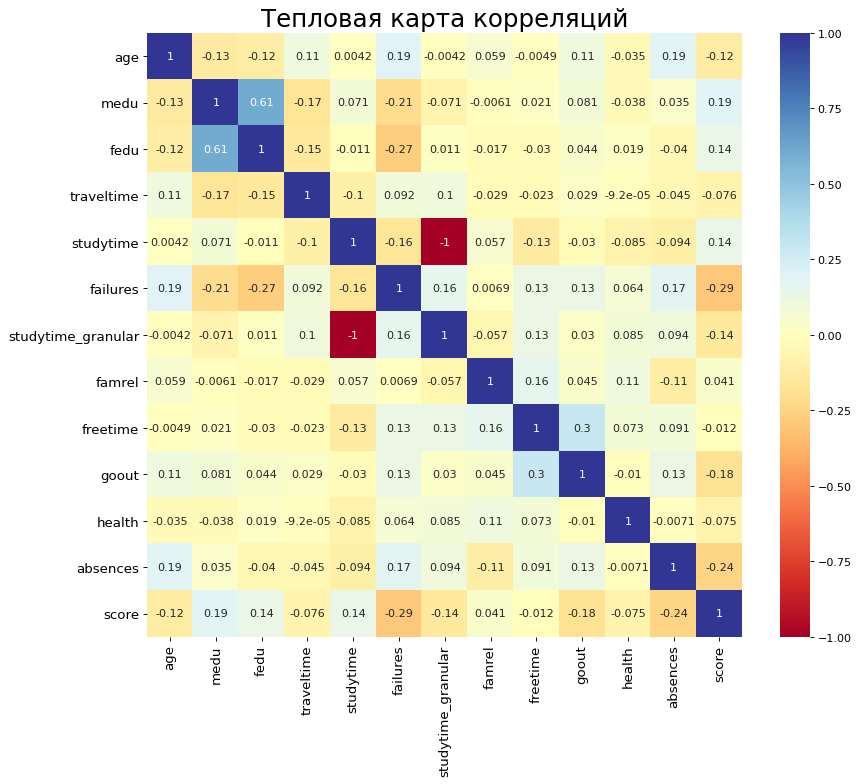

In [ ]:
# Построим тепловую карту корреляций числовых данных
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(
    students.corr(),
    xticklabels=students.corr().columns,
    yticklabels=students.corr().columns,
    cmap= 'RdYlBu', #'RdYlGn',
    center=0,
    annot=True
)
 
plt.title('Тепловая карта корреляций', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Столбец studytime_granular полностью антикореллирован со столбцом
# studytime и может быть исключен:
students.drop(['studytime_granular'], inplace = True, axis = 1)

# Также довольно сильно скореллированы (коэф. корр. ~0,63) столбцы
# fedu и medu, одну из переменных можно убрать из рассмотрения,
# Пусть это будет medu:
students.drop(['medu'], inplace = True, axis = 1)

#Анализ номинативных переменных

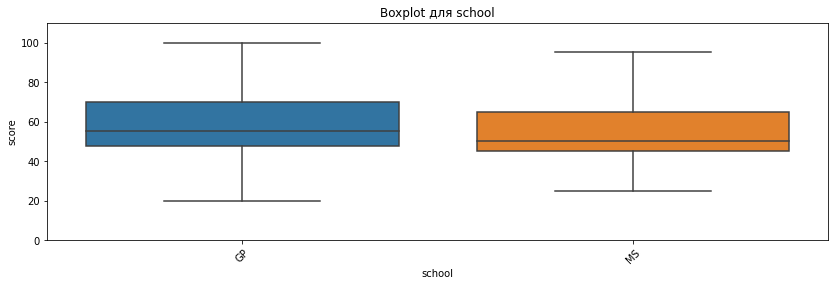

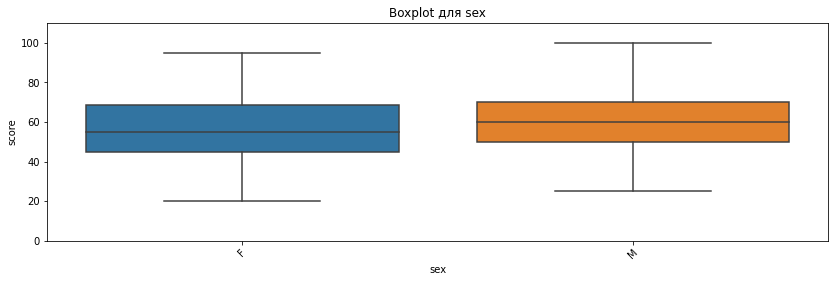

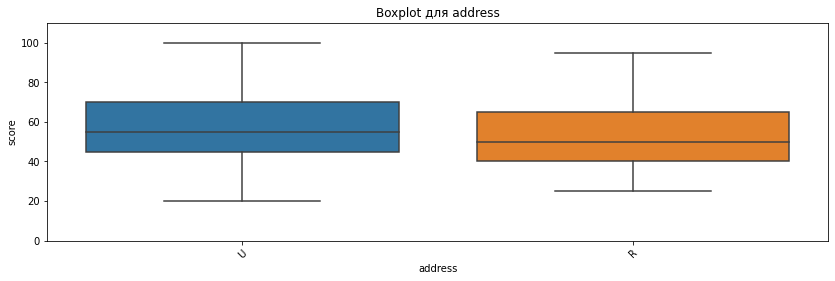

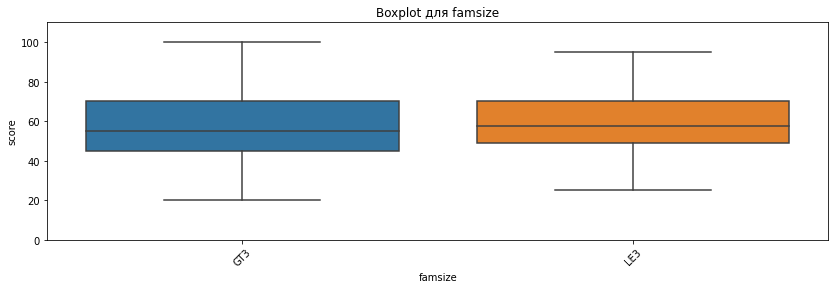

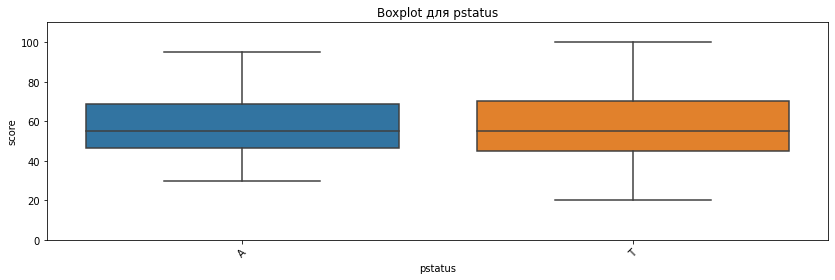

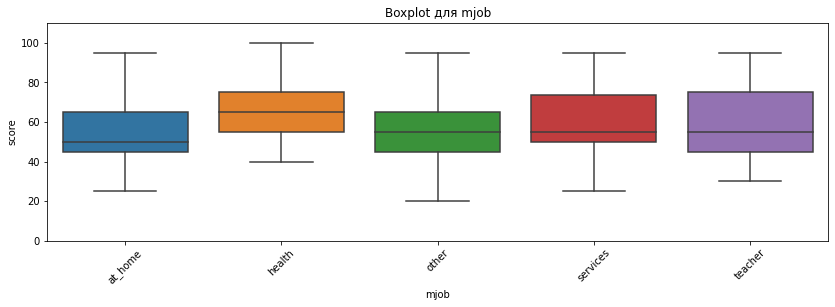

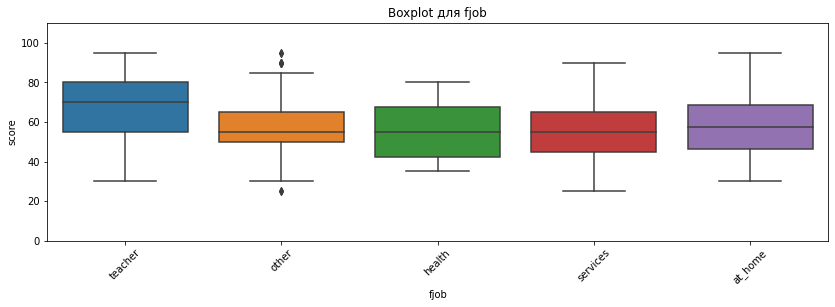

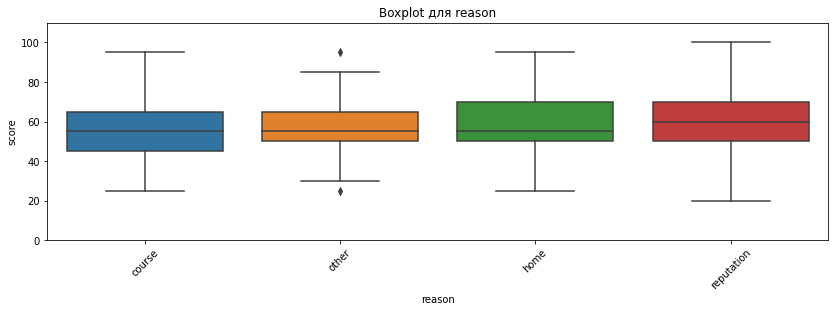

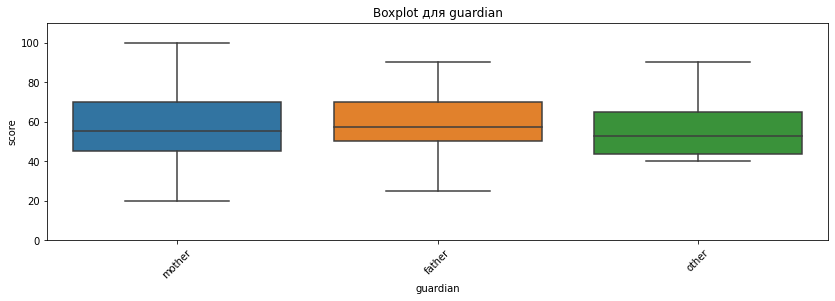

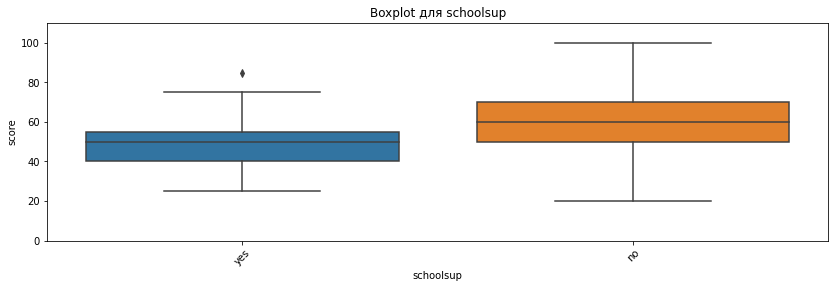

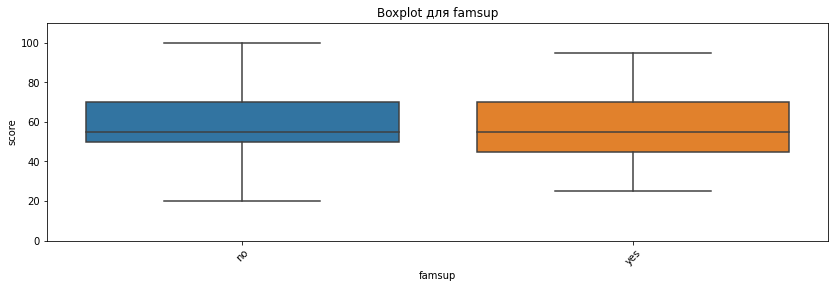

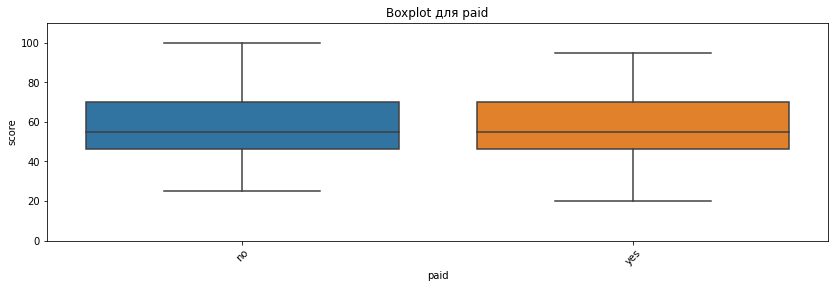

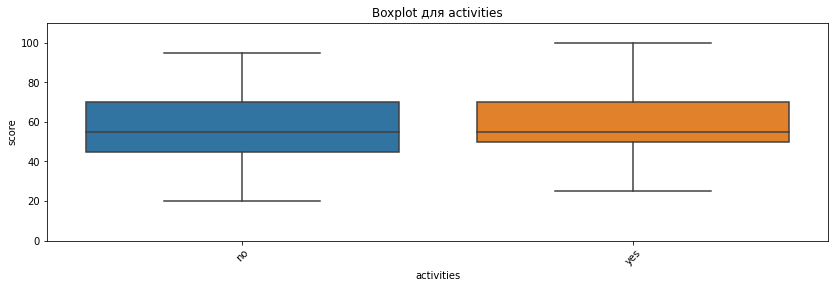

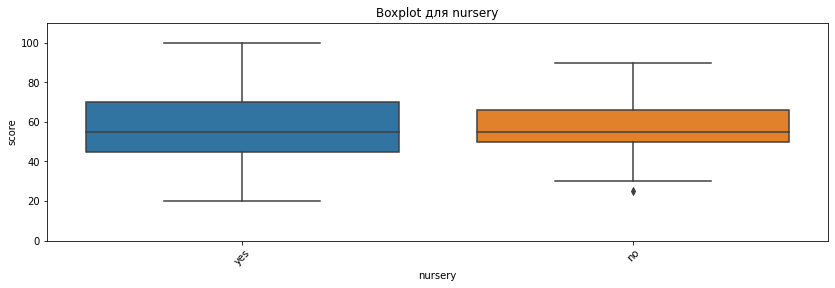

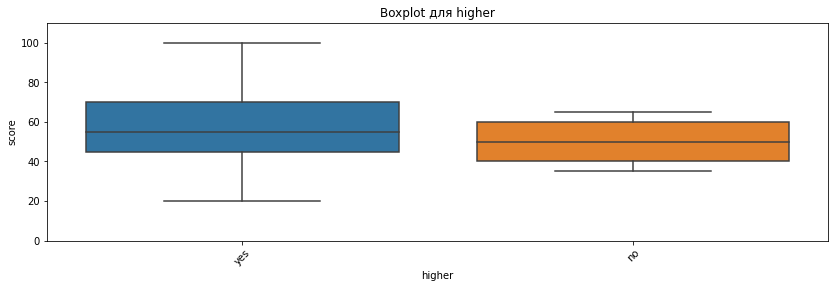

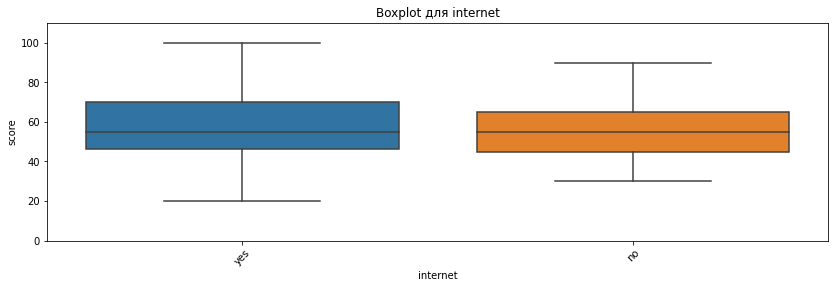

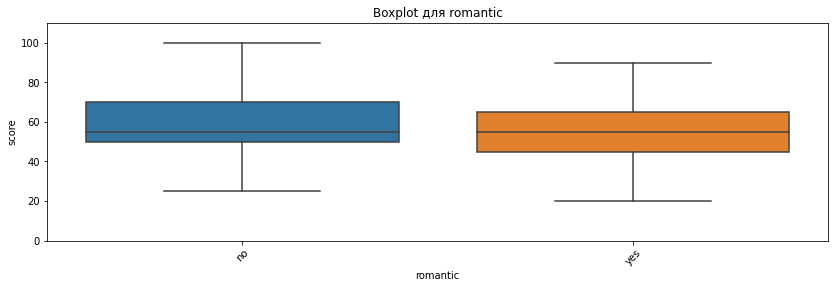

In [ ]:
#список столбцов с номинативными данными
nom_data_cols = \
    students.loc[:, students.loc[full_row_index, :].apply(type) == str].columns

# Построим графики boxplot для номинативных переменных и 
# оценим по ним, какие переменные могут влиять на переменную score
for col in nom_data_cols:
    get_boxplot(col)

In [ ]:
# Исходя из графиков, на переменную score могут влиять столбцы
# address, pstatus, mjob, fjob, reason,
# guardian, schoolsup, higher, internet 

# Оценим статистическую значимость различия средних значений параметра score,
# распределенного по различным номинативным характеристикам с помощью
# двухстороннего теста Стьюдента с учетом поправки Бонферрони:

for col in nom_data_cols:
    get_stat_dif(col, 0.05, 5)

Найдены статистически значимые различия для столбца address
Найдены статистически значимые различия для столбца mjob
Найдены статистически значимые различия для столбца fjob
Найдены статистически значимые различия для столбца schoolsup


In [ ]:
# Подготовим окончательный вариант датафрейма для построения модели,
# оставив только числовые переменные и номинативные переменные, для 
# которых были найдены статистически значимые отличия в средних значениях
# целевой переменной score
 
#отфильтруем числовые столбцы
num_data_cols = \
    students.loc[:, students.loc[full_row_index, :].apply(type) != str].columns
    
students_for_model = students.loc[:,[
                                     'address',
                                     'mjob',
                                     'higher',
                                     'romantic'
                                    ] + list(num_data_cols)
]
students_for_model.sample(10)

,address,mjob,higher,romantic,age,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
247,U,services,no,yes,NaN,1.0,1.0,1.0,3.0,5.0,4.0,5.0,1.0,16.0,40.0
108,R,other,yes,yes,15.0,4.0,4.0,4.0,NaN,1.0,3.0,5.0,1.0,6.0,65.0
230,U,health,yes,yes,17.0,3.0,1.0,2.0,0.0,3.0,2.0,3.0,3.0,14.0,70.0
169,U,health,yes,yes,16.0,4.0,1.0,2.0,0.0,4.0,4.0,2.0,3.0,0.0,70.0
167,U,health,yes,yes,16.0,2.0,1.0,2.0,0.0,4.0,2.0,3.0,3.0,0.0,80.0
35,U,other,yes,no,15.0,3.0,NaN,1.0,0.0,3.0,5.0,1.0,5.0,0.0,30.0
114,R,health,yes,yes,15.0,1.0,1.0,2.0,NaN,5.0,4.0,2.0,5.0,8.0,45.0
257,U,services,yes,no,19.0,3.0,1.0,2.0,0.0,4.0,3.0,1.0,1.0,12.0,55.0
289,U,teacher,yes,no,18.0,4.0,1.0,2.0,0.0,5.0,4.0,3.0,2.0,9.0,75.0
60,R,health,yes,no,16.0,4.0,1.0,2.0,0.0,2.0,4.0,4.0,4.0,6.0,55.0


# ***Выводы:***
 
---
 
 
 
 
*   В данных присутствуют пустые значения, но их доля не превышает ≈ 10  %.
*  Выбросы обнаружены только в столбцах  *age*, *absences* и *score*. Их доля не превышает 4% всех данных, что говорит о достаточной чистоте данных. Причем "выброс" нулевых значений в столбце score возможно связан с неунимодальностью распределения score. Вопрос требует дальнейшего изучения.
* Обнаружена практически полная корреляция значений *studytime* и *studytime_granular*, что позволило исключить столбец *studytime_granular* из дальнейшего рассмотрения, тем более, что смысл этой величины неизвестен.
*  Обнаружена заметная корреляция между признаками *fedu* и *medu*. Признак *medu* решено исключить.
*  Для построения модели предлагается взять следующие параметры: *address*, *mjob*, *higher*, *romantic*, *absences*, *famrel*, *freetime*, *goout*, *health*, *age*, *fedu*, *traveltime*, *studytime*, *failures*